In [ ]:
pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.6 MB/s eta 0:00:00


In [ ]:
pip install networkx matplotlib

In [ ]:
import networkx as nx
import pandas as pd

In [ ]:
import requests
import csv

# Definir una consulta Overpass para obtener puntos de interés en Florencia
overpass_url = "https://overpass-api.de/api/interpreter"
query = """
[out:json];
area["name"="Firenze"]->.a;
(
  node["tourism"="attraction"](area.a);
  way["tourism"="attraction"](area.a);
  rel["tourism"="attraction"](area.a);
);
out center;
"""

# Realizar la consulta Overpass
response = requests.get(overpass_url, params={'data': query})
data = response.json()

# Abrir un archivo CSV para escritura
csv_file_path = "pois_florencia.csv"
with open(csv_file_path, 'w', newline='', encoding='utf-8') as csv_file:
    # Crear un objeto escritor CSV
    csv_writer = csv.writer(csv_file)

    # Escribir encabezados
    csv_writer.writerow(['ID', 'Tipo', 'Latitud', 'Longitud', 'Etiquetas'])

    # Procesar y escribir los resultados en el archivo CSV
    for element in data['elements']:
        element_id = element['id']
        element_type = element['type']
        element_tags = element.get('tags', {})
        lat = element.get('lat', None)
        lon = element.get('lon', None)

        csv_writer.writerow([element_id, element_type, lat, lon, element_tags])

print(f"Los datos se han guardado en el archivo CSV: {csv_file_path}")

Los datos se han guardado en el archivo CSV: pois_florencia.csv


In [ ]:
import pandas as pd
import math
import numpy as np

# Función para simular tiempo de visita con incertidumbre (por ejemplo, utilizando una distribución normal)
def simulate_visit_duration():
    # En este ejemplo, asumimos una distribución normal con media de 2 horas y desviación estándar de 0.5 horas
    mean_duration = 2.0
    std_dev_duration = 0.5
    visit_duration = np.random.normal(mean_duration, std_dev_duration)
    return max(visit_duration, 0)  # Aseguramos que la duración sea no negativa

# Función para calcular el tiempo de tráfico entre dos POIs
def calculate_traffic_time(distance_km, transport_speed_kmph):
    traffic_time_hours = distance_km / transport_speed_kmph
    return traffic_time_hours

# Función para calcular la distancia entre dos coordenadas utilizando la fórmula haversine
def haversine(coord1, coord2):
    R = 6371  # Radio de la Tierra en kilómetros

    lat1, lon1 = math.radians(coord1[0]), math.radians(coord1[1])
    lat2, lon2 = math.radians(coord2[0]), math.radians(coord2[1])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    distance_km = R * c
    return distance_km

# Cargar datos desde el archivo CSV
csv_file_path = "pois_florencia.csv"  # Reemplaza con el nombre de tu archivo CSV
df = pd.read_csv(csv_file_path)

# Iterar sobre pares de puntos de interés y realizar simulaciones
for i in range(len(df) - 1):
    poi1_coordinates = (df.at[i, 'Latitud'], df.at[i, 'Longitud'])
    poi2_coordinates = (df.at[i + 1, 'Latitud'], df.at[i + 1, 'Longitud'])
    transport_speed_kmph = 4  # Velocidad de transporte en kilómetros por hora

    # Calcular la distancia entre los dos POIs
    distance_between_pois = haversine(poi1_coordinates, poi2_coordinates)

    # Calcular el tiempo de tráfico entre los dos POIs
    traffic_time = calculate_traffic_time(distance_between_pois, transport_speed_kmph)

    # Simular el tiempo de visita al POI
    visit_duration = simulate_visit_duration()

    # Imprimir resultados
    print(f"Para el par de POIs {df.at[i, 'ID']} y {df.at[i + 1, 'ID']}:")
    print(f"  - Tiempo de tráfico entre los POIs: {traffic_time:.2f} horas")
    print(f"  - Duración simulada de visita al POI: {visit_duration:.2f} horas")
    print()

Para el par de POIs 946018387 y 946019247:
  - Tiempo de tráfico entre los POIs: 0.02 horas
  - Duración simulada de visita al POI: 1.64 horas

Para el par de POIs 946019247 y 1088111706:
  - Tiempo de tráfico entre los POIs: 5.02 horas
  - Duración simulada de visita al POI: 2.31 horas

Para el par de POIs 1088111706 y 1088947550:
  - Tiempo de tráfico entre los POIs: 1.18 horas
  - Duración simulada de visita al POI: 1.77 horas

Para el par de POIs 1088947550 y 1241683593:
  - Tiempo de tráfico entre los POIs: 8.86 horas
  - Duración simulada de visita al POI: 1.61 horas

Para el par de POIs 1241683593 y 1701719806:
  - Tiempo de tráfico entre los POIs: 7.63 horas
  - Duración simulada de visita al POI: 2.23 horas

Para el par de POIs 1701719806 y 1944619934:
  - Tiempo de tráfico entre los POIs: 10.11 horas
  - Duración simulada de visita al POI: 2.54 horas

Para el par de POIs 1944619934 y 2576926265:
  - Tiempo de tráfico entre los POIs: 10.89 horas
  - Duración simulada de visita

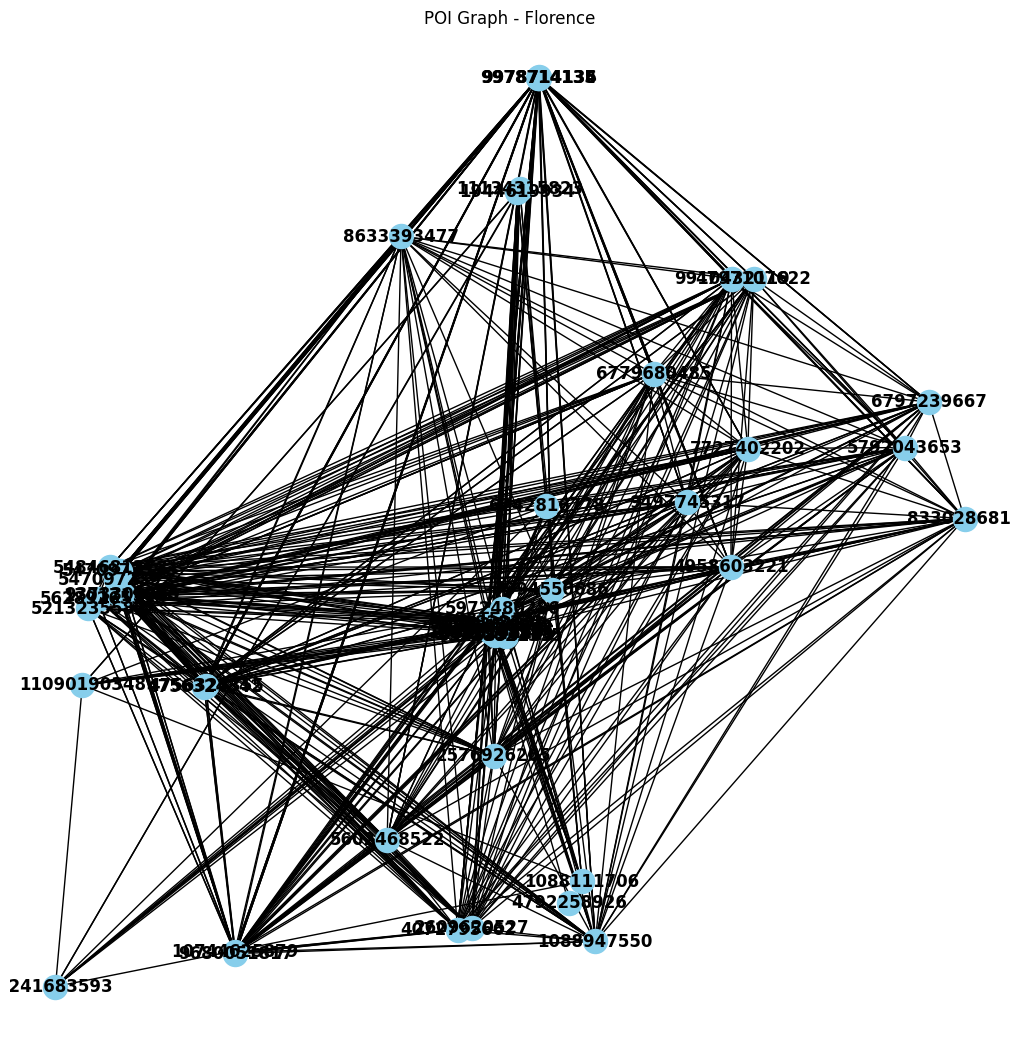

In [ ]:
# Read dataset from CSV
df = pd.read_csv('pois_florencia.csv')

# Extracting data from the DataFrame
poi_ids = df['ID'].tolist()
poi_locations = list(zip(df['Latitud'], df['Longitud']))
poi_labels = df['Etiquetas'].tolist()

# Create a graph
graph = nx.Graph()

# Add nodes to the graph
for poi_id, poi_location, poi_label in zip(poi_ids, poi_locations, poi_labels):
    graph.add_node(poi_id, location=poi_location, labels=poi_label)

# Connect nodes based on shared labels (for simplicity)
for i in range(len(poi_ids)):
    for j in range(i + 1, len(poi_ids)):
        labels_i = set(poi_labels[i].split(','))
        labels_j = set(poi_labels[j].split(','))

        if labels_i.intersection(labels_j):
            graph.add_edge(poi_ids[i], poi_ids[j])

import matplotlib.pyplot as plt

pos = {node: (lon, lat) for node, (lat, lon) in zip(poi_ids, poi_locations)}

plt.figure(figsize=(10, 10))
nx.draw(graph, pos, with_labels=True, font_weight='bold', node_size=300, node_color='skyblue')
plt.title('POI Graph - Florence')
plt.show()

In [ ]:
import random

# Función para simular un random walk en el grafo
def simulate_random_walk(graph, start_node, steps=10):
    current_node = start_node
    for _ in range(steps):
        neighbors = list(graph.neighbors(current_node))
        if neighbors:
            current_node = random.choice(neighbors)
    return current_node

# Número de simulaciones
num_simulations = 1000

# Inicializar diccionario para contar la frecuencia de visitas simuladas
simulated_visits = {node: 0 for node in graph.nodes}

# Realizar simulaciones de random walk y contar las visitas
for _ in range(num_simulations):
    start_node = random.choice(list(graph.nodes))
    end_node = simulate_random_walk(graph, start_node)
    simulated_visits[end_node] += 1

# Calcular la popularidad estimada basada en las simulaciones
estimated_popularity = {node: simulated_visits[node] / num_simulations for node in graph.nodes}
print("Estimación de popularidad de POIs:", estimated_popularity)

Estimación de popularidad de POIs: {946018387: 0.008, 946019247: 0.007, 1088111706: 0.005, 1088947550: 0.008, 1241683593: 0.007, 1701719806: 0.01, 1944619934: 0.008, 2576926265: 0.006, 2609620527: 0.004, 3740621395: 0.005, 4072795662: 0.006, 4129833608: 0.004, 4701406592: 0.006, 4756324342: 0.007, 4756324355: 0.009, 4792258926: 0.006, 4797107622: 0.005, 4958603221: 0.012, 5058828321: 0.007, 5188361676: 0.005, 5213235582: 0.009, 5470972392: 0.01, 5470972393: 0.003, 5484681373: 0.004, 5602468522: 0.006, 5628926533: 0.007, 5792043653: 0.006, 5972480286: 0.004, 6242816778: 0.013, 6483155146: 0.006, 6548893485: 0.014, 6779680485: 0.01, 6797239667: 0.007, 7727402202: 0.006, 7994550686: 0.007, 8037518285: 0.007, 8330286817: 0.008, 8633393477: 0.005, 9373306349: 0.012, 9497745317: 0.009, 9680051817: 0.008, 9910432119: 0.01, 9978714134: 0.007, 9978714135: 0.004, 9978714136: 0.006, 10744625879: 0.006, 10778248105: 0.003, 11090190348: 0.012, 11134315823: 0.01, 24879633: 0.011, 27590454: 0.007, 41

In [ ]:
# Learn transition probability
def learn_transition_probability(graph):

    if len(graph.nodes) == 0 or len(graph.edges) == 0:
        raise ValueError("Graph must have nodes and edges.")

    adjacency_matrix = nx.adjacency_matrix(graph).toarray()

    transition_probability = adjacency_matrix / adjacency_matrix.sum(axis=1, keepdims=True)

    return transition_probability

transition_probability = learn_transition_probability(graph)
print("Transition Probability Matrix:")
print(transition_probability)

Transition Probability Matrix:
[[0.         0.01449275 0.01449275 ... 0.01449275 0.01449275 0.01449275]
 [0.01449275 0.         0.01449275 ... 0.01449275 0.01449275 0.01449275]
 [0.01449275 0.01449275 0.         ... 0.01449275 0.01449275 0.01449275]
 ...
 [0.01333333 0.01333333 0.01333333 ... 0.         0.01333333 0.01333333]
 [0.01333333 0.01333333 0.01333333 ... 0.01333333 0.         0.01333333]
 [0.01428571 0.01428571 0.01428571 ... 0.01428571 0.01428571 0.        ]]


In [ ]:
# Este metodo se utilizará para comprobar que los nodos del grafo tengan índices consecutivos y comiencen desde 0
node_mapping = {old_index: new_index for new_index, old_index in enumerate(graph.nodes)}

reindexed_graph = nx.relabel_nodes(graph, node_mapping)

adjacency_matrix = nx.convert_matrix.to_numpy_array(reindexed_graph)

print("Matriz de Adyacencia:")
print(adjacency_matrix)

Matriz de Adyacencia:
[[0. 1. 1. ... 1. 1. 1.]
 [1. 0. 1. ... 1. 1. 1.]
 [1. 1. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch_geometric.nn import GraphConv
from torch_geometric.data import Data

# Definir el modelo GNN
class GNNModel(nn.Module):
    def __init__(self, num_user_features, num_classes):
        super(GNNModel, self).__init__()
        self.conv1 = GraphConv(1, 64)
        self.conv2 = GraphConv(64, 32)
        self.fc_user = nn.Linear(num_user_features, 32)
        self.fc_final = nn.Linear(32, num_classes)

    def forward(self, x, edge_index, user_features):
        # Propagación a través de capas convolucionales
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))

        # Incorporación de preferencias del usuario
        user_embedding = F.relu(self.fc_user(user_features))

        # Combinar representaciones de POIs y usuarios
        x = x.mean(dim=0)  # Podrías usar capas de pooling más sofisticadas aquí
        x = torch.cat([x, user_embedding], dim=0)

        # Capa completamente conectada final
        x = self.fc_final(x)

        return F.log_softmax(x, dim=1)

# Función para aprender la probabilidad de transición con incertidumbre
def learn_transition_probability_with_uncertainty(graph, user_decisions):
    if len(graph.nodes) == 0 or len(graph.edges) == 0:
        raise ValueError("Graph must have nodes and edges.")

    adjacency_matrix = nx.adjacency_matrix(graph).toarray()

    transition_probability = adjacency_matrix / adjacency_matrix.sum(axis=1, keepdims=True)

    uncertainty_factor = 0.2
    for edge in graph.edges:
        i, j = edge
        user_confidence = user_decisions.get((i, j), 0.5)
        transition_probability[i, j] = (1 - uncertainty_factor) * transition_probability[i, j] + uncertainty_factor * user_confidence

    return transition_probability

# Uso
user_decisions = {(1, 2): 0.8, (3, 4): 0.6}

transition_probability_with_uncertainty = learn_transition_probability_with_uncertainty(reindexed_graph, user_decisions)

print("Transition Probability Matrix with Uncertainty:")
print(transition_probability_with_uncertainty)

Transition Probability Matrix with Uncertainty:
[[0.         0.1115942  0.1115942  ... 0.1115942  0.1115942  0.1115942 ]
 [0.01449275 0.         0.1715942  ... 0.1115942  0.1115942  0.1115942 ]
 [0.01449275 0.01449275 0.         ... 0.1115942  0.1115942  0.1115942 ]
 ...
 [0.01333333 0.01333333 0.01333333 ... 0.         0.11066667 0.11066667]
 [0.01333333 0.01333333 0.01333333 ... 0.01333333 0.         0.11066667]
 [0.01428571 0.01428571 0.01428571 ... 0.01428571 0.01428571 0.        ]]


In [ ]:
pip install geopy

In [ ]:
import numpy as np
import pandas as pd
from geopy.distance import geodesic

def calculate_immediate_reward(pr_1, p):
    distance = calculate_distance(pr_1, p)

    if distance < 5:
        reward = 10  # Recompensa por distancias cortas
    else:
        reward = -distance  # Penalización lineal por distancias largas

    return reward

def calculate_distance(pr_1, p):
    if isinstance(pr_1, int) and pr_1 >= 0 and pr_1 < len(poi_data):
        coords_pr_1 = (poi_data.loc[pr_1, 'Latitud'], poi_data.loc[pr_1, 'Longitud'])
        coords_p = (poi_data.loc[p, 'Latitud'], poi_data.loc[p, 'Longitud'])

        if any(not np.isfinite(coord) for coord in coords_pr_1) or any(not np.isfinite(coord) for coord in coords_p):
            return 0
        else:
            distance = geodesic(coords_pr_1, coords_p).km
            return distance
    else:
        return 0

def epsilon_greedy(Q, pr_1, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(Q.shape[1])  # Se elige aleatoriamente entre todas las acciones posibles
    else:
        return np.argmax(Q[pr_1, :])

# Q-learning algorithm
def q_learning_algorithm(data, max_iterations, max_total_cost, epsilon, alpha, gamma):
    num_POIs = len(data)
    P1 = 0
    Px = num_POIs - 1

    Q = np.zeros((num_POIs, num_POIs))

    for iteration in range(1, max_iterations + 1):
        trip = [P1, Px]
        TotalCost = 0

        for t in range(1, num_POIs - 1):
            pr_1 = trip[-2]

            # Use epsilon-greedy strategy to select the next POI
            p = epsilon_greedy(Q, pr_1, epsilon)

            # Append selected POI to the trip if it satisfies time constraint
            if TotalCost + calculate_distance(pr_1, p) < max_total_cost:
                trip.append(p)
                TotalCost += calculate_distance(pr_1, p)

                # Receive immediate reward
                immediate_reward = calculate_immediate_reward(pr_1, p)

                Q[pr_1, p] = (1 - alpha) * Q[pr_1, p] + alpha * (
                    immediate_reward + gamma * np.max(Q[p, :])
                )

        print(f"Iteration {iteration}: TotalCost = {TotalCost}, Trip = {trip}")

    return Q

# Load data from CSV
csv_path = 'pois_florencia.csv'
poi_data = pd.read_csv(csv_path)

# Set hyperparameters
max_iterations = 100
max_total_cost = 100
epsilon = 0.1
alpha = 0.1
gamma = 0.9

# Run the Q-learning algorithm
Q_values = q_learning_algorithm(poi_data, max_iterations, max_total_cost, epsilon, alpha, gamma)

# Optionally, you can print or use the learned Q-values
print("Learned Q-values:")
print(Q_values)

Iteration 1: TotalCost = 32.07697052396589, Trip = [0, 119, 0, 0, 0, 0, 0, 0, 36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 111, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 96, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 97, 0, 0, 0, 0, 0, 0, 0, 0, 0, 91, 0, 0, 0, 0, 0, 0]
Iteration 2: TotalCost = 90.768452631282, Trip = [0, 119, 41, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 92, 92, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 75, 0, 117, 0, 0, 0, 0, 0, 0, 35, 0, 0, 25, 0, 0, 0, 0, 0, 0, 0, 27, 0, 0, 0, 0, 0, 97, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 43, 0]
Iteration 3: TotalCost = 27.752018181258297, Trip = [0, 119, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 75, 0, 117, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 50, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 84, 0, 0

In [ ]:
import numpy as np
import pandas as pd
from geopy.distance import geodesic

def calculate_travel_time(current_poi, next_poi, poi_data, transport_speed_kmph):
    coords_current = (poi_data.loc[current_poi, 'Latitud'], poi_data.loc[current_poi, 'Longitud'])
    coords_next = (poi_data.loc[next_poi, 'Latitud'], poi_data.loc[next_poi, 'Longitud'])

    distance_km = haversine(coords_current, coords_next)
    travel_time_hours = calculate_traffic_time(distance_km, transport_speed_kmph)

    if(math.isnan(travel_time_hours)):
      travel_time_hours = 5
    return travel_time_hours

def generate_personalized_trip(Q, poi_data, start_poi, end_poi, max_total_cost, transport_speed_kmph):
    current_poi_index = start_poi
    trip = [current_poi_index]
    total_cost = 0

    while total_cost < max_total_cost and current_poi_index != end_poi:
        possible_next_pois = [poi_index for poi_index in range(len(poi_data)) if poi_index not in trip]

        if not possible_next_pois:
            break

        next_poi_index = random.choice(possible_next_pois)
        travel_time = calculate_travel_time(current_poi_index, next_poi_index, poi_data, transport_speed_kmph)
        visit_duration = simulate_visit_duration()

        if total_cost + travel_time + visit_duration <= max_total_cost:
            trip.append(next_poi_index)
            total_cost += travel_time + visit_duration
            current_poi_index = next_poi_index
        else:
            break

        print(f"current_poi: {current_poi_index}, next_poi: {next_poi_index}, travel_time: {travel_time}, visit_duration: {visit_duration}, total_cost: {total_cost}")

    return trip, total_cost

# Cargar datos desde el archivo CSV
csv_path = 'pois_florencia.csv'
poi_data = pd.read_csv(csv_path)

# Setear parámetros
start_poi = 0
end_poi = len(poi_data) - 1
max_total_cost = 100
transport_speed_kmph = 4

# Correr el algoritmo Q-learning
Q_values = q_learning_algorithm(poi_data, max_iterations, max_total_cost, epsilon, alpha, gamma)
# Generar el viaje personalizado
personalized_trip, total_trip_cost = generate_personalized_trip(Q_values, poi_data, start_poi, end_poi, max_total_cost, transport_speed_kmph)

# Imprimir o utilizar el resultado del viaje personalizado
print("Personalized Trip:", personalized_trip)
print("Total Trip Cost:", total_trip_cost)

Iteration 1: TotalCost = 78.99535053302664, Trip = [0, 119, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 87, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 92, 0, 0, 0, 0, 0, 0, 0, 29, 0, 0, 0, 0, 67, 0, 0, 0, 86, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 42, 0, 60, 0, 0, 27, 75, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 78, 0, 0, 87, 0, 0, 0, 0, 0, 0, 0, 0, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Iteration 2: TotalCost = 94.43927925303716, Trip = [0, 119, 0, 28, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 109, 0, 0, 46, 0, 0, 0, 0, 112, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 0, 82, 119, 0, 8, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 0, 0, 0, 0, 0, 0, 89, 0, 0, 43, 0, 0, 63, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 0, 82, 0, 0, 0, 0, 0, 0, 0, 23, 0]
Iteration 3: TotalCost = 10.836567476989197, Trip = [0, 119, 0, 8, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 58, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0